In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
normalized_dat = StandardScaler().fit_transform(market_data_df)

In [7]:
# Create a DataFrame with the scaled data
dat = {}
for col_ind in range(len(market_data_df.columns)):
    dat[market_data_df.columns[col_ind]] = normalized_dat[:, col_ind]
normalized_df = pd.DataFrame(dat)
# Copy the crypto names from the original data
normalized_df['coinid'] = market_data_df.index


# Set the coinid column as index
normalized_df = normalized_df.set_index('coinid')


# Display sample data
normalized_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coinid,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_try = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_val = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k_val in k_try:
    k_mod = KMeans(k_val)
    k_mod.fit(normalized_df)
    inertia_val.append(k_mod.inertia_)


# Create a dictionary with the data to plot the Elbow curve
plottables = {"k means value": k_try, "inertia":inertia_val}

# Create a DataFrame with the data to plot the Elbow curve
plottables = pd.DataFrame(plottables)


# Display the DataFrame
plottables.head(10)

c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

,k means value,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,68.685015
5,6,56.168712
6,7,47.534766
7,8,39.631339
8,9,35.762053
9,10,29.618046


<Axes: xlabel='k means value'>

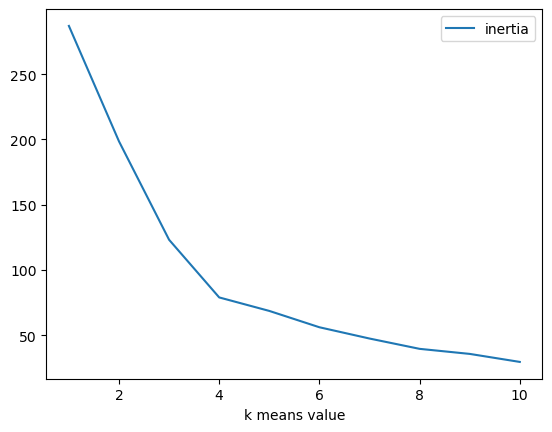

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plottables.plot(x="k means value", y = "inertia")
#By the looks of it, the optimal value is ~4

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for k appears to be 4 as this is where the least amount of change in inertia takes place. 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
best_k_mod = KMeans(4)


In [12]:
# Fit the K-Means model using the scaled data
best_k_mod.fit(normalized_df)

c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = best_k_mod.predict(normalized_df)

# View the resulting array of cluster values.
print(preds)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 0 1 1 2 1 1 1 0
 1 1 1 1]


In [14]:
# Create a copy of the DataFrame
cluster_df = normalized_df.copy()


In [15]:
# Add a new column to the DataFrame with the predicted clusters
cluster_df['crypto_cluster'] = preds

# Display sample data
cluster_df.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coinid,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

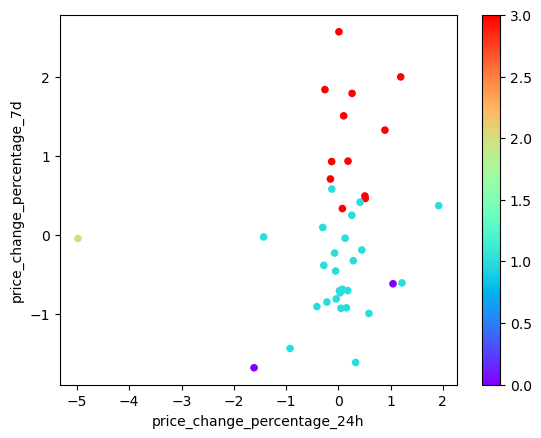

In [24]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
cluster_df.plot(x="price_change_percentage_24h", y="price_change_percentage_7d", c=cluster_df["crypto_cluster"], colormap='rainbow', kind='scatter')

### Optimize Clusters with Principal Component Analysis.

In [33]:
# Create a PCA model instance and set `n_components=3`.
pca_mod = PCA(n_components=3)

In [34]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
three_comp = pca_mod.fit_transform(normalized_dat)

# View the first five rows of the DataFrame. 
print(three_comp[:5, :])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [40]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
print(pca_mod.explained_variance_ratio_)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of these three components total to ~0.89 which suggests that the variance of these three components account for ~89% of the variance of the data. 

In [41]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Create a DataFrame with the PCA data
# Copy the crypto names from the original data
pca_df = pd.DataFrame({"coinid":market_data_df.index, 
                       "PCA1":three_comp[:, 0], 
                       "PCA2":three_comp[:,1],
                       "PCA3":three_comp[:, 2]})


# Set the coinid column as index
pca_df = pca_df.set_index('coinid')

# Display sample data
pca_df.head(5)

,PCA1,PCA2,PCA3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [42]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_try = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_val = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k_val in k_try:
    k_mod = KMeans(k_val)
    k_mod.fit(pca_df)
    inertia_val.append(k_mod.inertia_)


# Create a dictionary with the data to plot the Elbow curve
plottables = {"k means value": k_try, "inertia":inertia_val}

# Create a DataFrame with the data to plot the Elbow curve
plottables = pd.DataFrame(plottables)


# Display the DataFrame
plottables.head(10)




c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

,k means value,inertia
0,1,256.874086
1,2,201.978573
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.893370
6,7,21.145312
7,8,17.556701
8,9,13.814082
9,10,13.096830


<Axes: xlabel='k means value'>

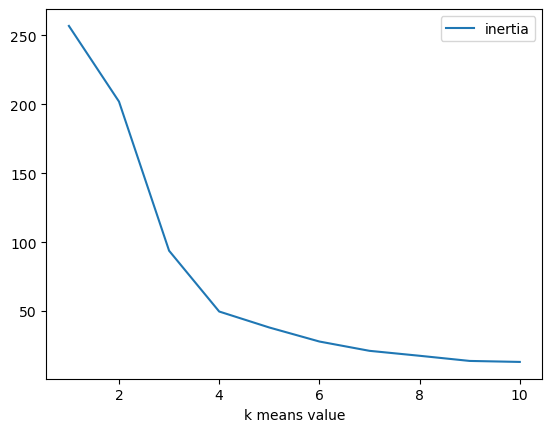

In [44]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plottables.plot(x='k means value', y = 'inertia')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Here it still seems like four is the best bet


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Value wise no, but there is a much steeper progression in the decrease of inertia values leading up to four than in the previous non PCA data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [45]:
# Initialize the K-Means model using the best value for k
k_mod = KMeans(4)

In [46]:
# Fit the K-Means model using the PCA data
k_mod.fit(pca_df)

c:\Users\Eza\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [47]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = k_mod.predict(pca_df)

# Print the resulting array of cluster values.
print(preds)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 1 0 2 2 3
 2 2 2 2]


In [48]:
# Create a copy of the DataFrame with the PCA data
pca_copy_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_copy_df['crypto_cluster'] = preds

# Display sample data
pca_copy_df.head(5)

,PCA1,PCA2,PCA3,crypto_cluster
coinid,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

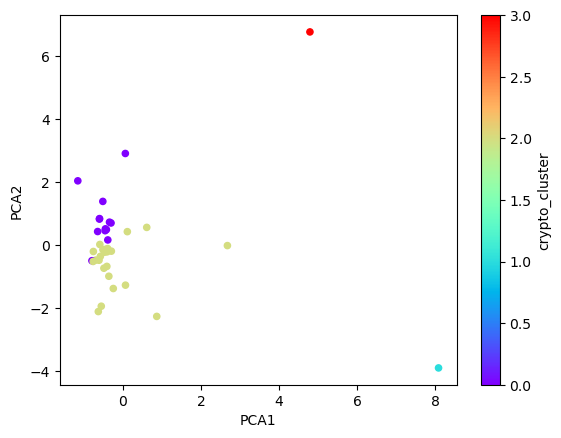

In [49]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_copy_df.plot(x="PCA1", y="PCA2", c="crypto_cluster", colormap="rainbow", kind='scatter')

### Determine the Weights of Each Feature on each Principal Component

In [53]:
# Use the columns from the original scaled DataFrame as the index.
weights = pd.DataFrame(pca_mod.components_.T, index=normalized_df.columns, columns=["PCA1", "PCA2", "PCA3"])
weights.head()

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** It looks as though for PCA1, the biggest negative influence is the 24 hour price change with the strongest positive being the 60 day price change. For PCA2, 30 day price change and no outright negative influence but the smallest positive influence is the 7 day price change. For PCA3, largest positive is 7 day price change, largest negative is 60 day price change.  
    